<a href="https://colab.research.google.com/github/andresanchetta/Analise_CNPJ/blob/main/AnaliseCNPJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação das biblíotecas e do DataFrame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as sts

In [4]:
#Link para o carregamento das informações:
url = 'http://200.152.38.155/CNPJ/K3241.K03200Y0.D10510.ESTABELE.zip'
#Nome das colunas, obtidos através do arquivo NOVOLAYOUTDOSDADOSABERTOSDOCNPJ.pdf
col_Names = ['CNPJBase', 'CNPJOrdem', 'CNPJDV', 'IDMatriz', 'NomeFantasia', 'SitCad', 'DataSitCad', 'MotivoSitCad', 'CidadeExt', 'Pais', 'DataInicio', 'CNAEPrinc', 'CNAESec', 'TipoLogr', 'Logr', 'Numero', 'Compl', 'Bairro', 'CEP', 'UF', 'Municipio', 'DDD1', 'TEL1', 'DDD2', 'TEL2', 'DDDFax', 'Fax', 'email', 'SitEsp', 'DataSitEsp']

#Carregamento do DF
dados = pd.read_csv(url, compression='zip', sep=';', encoding='latin1', names = col_Names)

#Cabeçalho do DF para verificação das informações:
dados.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,21,22,24,26,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CNPJBase,CNPJOrdem,CNPJDV,IDMatriz,NomeFantasia,SitCad,DataSitCad,MotivoSitCad,CidadeExt,Pais,DataInicio,CNAEPrinc,CNAESec,TipoLogr,Logr,Numero,Compl,Bairro,CEP,UF,Municipio,DDD1,TEL1,DDD2,TEL2,DDDFax,Fax,email,SitEsp,DataSitEsp
0,33600823,1,7,1,SALGADOS DA ERIDIANA,8,20190722,1,NaN,NaN,20190513,5620104,"1096100,1093702",RUA,EMILIO VASCONCELOS,288,NaN,CENTRO,39790000.0,MG,4011,33,8.83338e+07,NaN,NaN,NaN,NaN,adelano.deptofiscal@gmail.com,NaN,NaN
1,33600832,1,6,1,DALUARI BOUTIQUE,2,20190513,0,NaN,NaN,20190513,4781400,"4782201,4782202,4783101,4783102",AVENIDA,JOSE TOZZI,1831,LOJA 04,CENTRO,29930245.0,ES,5697,27,3.76382e+07,NaN,NaN,NaN,NaN,CADASTRO@PEREIRABCONTABILIDADE.COM.BR,NaN,NaN
2,33600844,1,22,1,NaN,2,20190513,0,NaN,NaN,20190513,4399103,4330404,AVENIDA,TOKISHIRO TOYAMA,194,NaN,CENTRO,18180000.0,SP,7171,15,9.98423e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33600854,1,68,1,IARA GASTROPEDIATRA,2,20190513,0,NaN,NaN,20190513,8610102,8630503,RUA,DEZ,SN,NaN,PLANALTO VINHAIS II,65074863.0,MA,921,98,8.1771e+07,NaN,NaN,NaN,NaN,SEBACARIBEIRO@YAHOO.COM,NaN,NaN
4,33600865,1,48,1,VIVI BELLE,2,20190513,0,NaN,NaN,20190513,4781400,4789099,RUA,MARTINS TORRES,542,APT 203;BLOCO 06,SANTA ROSA,24240705.0,RJ,5865,21,2.61022e+07,NaN,NaN,NaN,NaN,vidsouza13@gmail.com,NaN,NaN


In [5]:
#Verificação da quantidade de dados:
dados.shape

(5640704, 30)

#Investigação quanto as quantidades de acordo com o Estado.

In [6]:
#Visualização da contagem do número de CPFS por estado.
dados['UF'].value_counts()

SP    1614537
MG     619283
RJ     491987
RS     399715
PR     379038
BA     286055
SC     254639
GO     195319
PE     172040
CE     160256
ES     118222
PA     116348
MT     103308
DF      95050
MA      86879
MS      75966
PB      72238
RN      65864
AM      59586
AL      54390
PI      49866
RO      39950
TO      38448
SE      38427
EX      15883
AC      13521
AP      13115
RR      10773
BR          1
Name: UF, dtype: int64

Nota-se que além da presença dos 26 estados e do Distrito Federal, ainda existe a presença de dois valores anormais, EX e BR.

In [7]:
#Analise sobre o significado do UF = 'EX'
dados.query('UF == "EX"').head()

,CNPJBase,CNPJOrdem,CNPJDV,IDMatriz,NomeFantasia,SitCad,DataSitCad,MotivoSitCad,CidadeExt,Pais,DataInicio,CNAEPrinc,CNAESec,TipoLogr,Logr,Numero,Compl,Bairro,CEP,UF,Municipio,DDD1,TEL1,DDD2,TEL2,DDDFax,Fax,email,SitEsp,DataSitEsp
544,33606798,1,79,1,NaN,2,20190513,0,NaN,149.0,20190513,6630400,NaN,NaN,"QUEEN STREET EAST, 2",0,20TH FLOOR M5C 3G7,TORONTO,NaN,EX,9707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584,33607263,1,12,1,AGENCIA KTBO,2,20190513,0,MIGUEL HIDALGO,493.0,20190513,7319004,NaN,NaN,CALZADA GRAL. MARIANO ESCOBEDO 555 PISO,S/N,8 Y 9 BOSQUES DE CHAP 11580,MIGUEL HIDALGO,NaN,EX,9707,NaN,NaN,NaN,NaN,NaN,NaN,MARIO@KTBO.COM.BR,NaN,NaN
1829,33620646,1,20,1,NaN,2,20190514,0,NaN,249.0,20190514,6630400,NaN,NaN,245 SUMMER STREET,0,02210,BOSTON,NaN,EX,9707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3081,33634059,1,90,1,NaN,2,20190515,0,NaN,399.0,20190515,6630400,NaN,NaN,2-2-2 OTEMACHI CHIYODA-KU 1000004 TOKYO JAPAN,0,1000004,TOKYO,NaN,EX,9707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4384,33647844,1,88,1,MELLBURRY,2,20190516,0,ROAD TOWN,863.0,20190516,6463800,NaN,NaN,"TRIDENT CHAMBERS, WICKHAMS CAY,",S/N,P.O. BOX 146,ROAD TOWN,NaN,EX,9707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dados.query('UF == "EX"')['UF'].count()

15883

Conclui-se que indica CNPJs os quais possuem um endereço no exterior, os quais totalizam 15883 instâncias. 

In [9]:
#Investigação do UF: BR
dados.query('UF == "BR"')

,CNPJBase,CNPJOrdem,CNPJDV,IDMatriz,NomeFantasia,SitCad,DataSitCad,MotivoSitCad,CidadeExt,Pais,DataInicio,CNAEPrinc,CNAESec,TipoLogr,Logr,Numero,Compl,Bairro,CEP,UF,Municipio,DDD1,TEL1,DDD2,TEL2,DDDFax,Fax,email,SitEsp,DataSitEsp
2163139,5269598,1,32,1,NaN,8,20021231,1,NaN,NaN,20020911,9492800,NaN,RUA,DAS MARRECAS,000027,3: ANDAR - CENTRO,NaN,20031120.0,BR,6001,NaN,NaN,NaN,NaN,NaN,NaN,pcb@pcb.org.br,NaN,NaN


Através dessa análise e utilizando uma ferramenta de pesquisa para verificação do endereço através do CEP (20031-120), conclui-se que a informação foi digitada errada, o UF do endereço é RJ.

In [10]:
#Correção do UF informado acima (linha 2136139 e coluna 19):
dados.iloc[2163139,19] = 'RJ'

In [11]:
#Verificação se o valor foi corrigido:
dados.query('UF == "BR"')

,CNPJBase,CNPJOrdem,CNPJDV,IDMatriz,NomeFantasia,SitCad,DataSitCad,MotivoSitCad,CidadeExt,Pais,DataInicio,CNAEPrinc,CNAESec,TipoLogr,Logr,Numero,Compl,Bairro,CEP,UF,Municipio,DDD1,TEL1,DDD2,TEL2,DDDFax,Fax,email,SitEsp,DataSitEsp


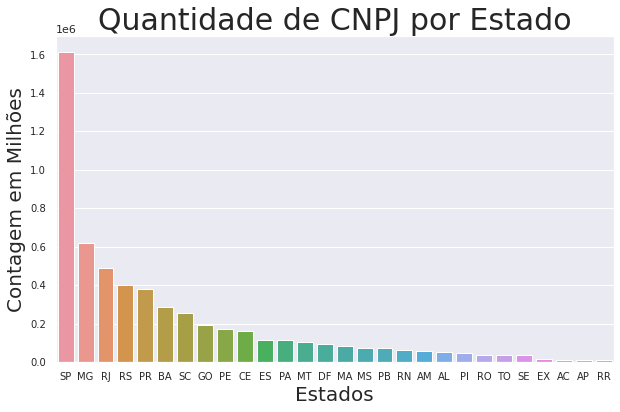

In [12]:
#Criação dos indices para order o histograma do maior para o menor
contUF = dados['UF'].value_counts().index

#Impressão do Histograma
sns.set()
plt.figure(figsize=(10, 6))
ax = sns.countplot(x = 'UF', data=dados, order = contUF)
ax.set_title('Quantidade de CNPJ por Estado', fontsize=30)
ax.set_xlabel('Estados',fontsize=20)
ax.set_ylabel('Contagem em Milhões',fontsize=20)
ax.tick_params(labelsize=10)
plt.show()

#Análise quanto a data de ínicio

In [13]:
#Descrição dos dados para identificação do valor máximo e mínimo:
dados['DataInicio'].describe()

count    5.640704e+06
mean     2.009045e+07
std      1.260285e+05
min      1.901010e+07
25%      2.002102e+07
50%      2.014040e+07
75%      2.019072e+07
max      2.021051e+07
Name: DataInicio, dtype: float64

In [14]:
#Os dados se encontram no formato Float, por isso é necessário uma transformação para DateTime:
dados['DataInicio'] = pd.to_datetime(dados['DataInicio'], format='%Y%m%d') 

In [15]:
#Conferencia da mudança do tipo de dados:
dados['DataInicio'].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                 5640704
unique                  19333
top       2020-09-26 00:00:00
freq                    30300
first     1901-01-01 00:00:00
last      2021-05-11 00:00:00
Name: DataInicio, dtype: object

In [16]:
#Criando objeto para estudo do DF agrupado por ano:
analise_data = dados['DataInicio'].dt.year.value_counts()

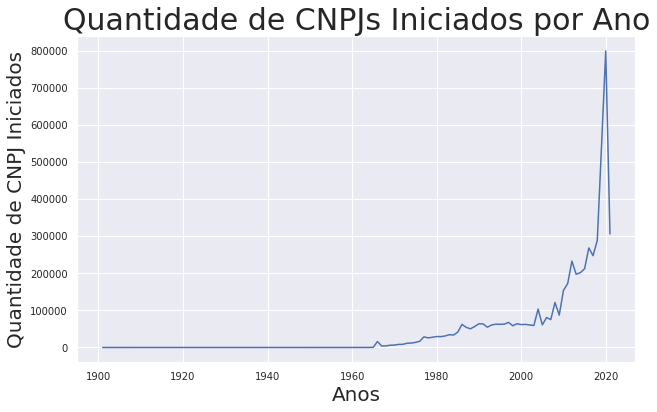

In [17]:
#Gráfico para análise da quantidade de CNPJs iniciados por ano:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=analise_data)
ax.set_title('Quantidade de CNPJs Iniciados por Ano', fontsize=30)
ax.set_xlabel('Anos',fontsize=20)
ax.set_ylabel('Quantidade de CNPJ Iniciados',fontsize=20)
ax.tick_params(labelsize=10)
plt.show()

#Analise de Situação Cadastral

CÓDIGO DA SITUAÇÃO CADASTRAL:  
**1 – NULA**  
As companhias ou suas filiais que têm características duvidosas são enquadradas como situação cadastral nula. Pode ser um caso de duplicidade de inscrição municipal ou estadual, desobrigação de ter esse número ou a constatação de ações ilícitas no ato de registro.
    
**2 – ATIVA**  
O negócio está regularizado e não existem pendências.  

**3 – SUSPENSA**   
O CNPJ apresenta algum problema, como a matriz ou a filial tem domicílio no exterior, deixou de cumprir as obrigações, há inconsistência nos dados ou indícios de fraudes. É preciso investigar e ter atenção.    
   
**4 – INAPTA**   
As empresas que deixam de apresentar demonstrativos e declarações contábeis por dois anos consecutivos são enquadradas nessa classificação. Alguns exemplos desses documentos são: escrituração contábil digital, declaração de créditos e débitos tributários, declaração simplificada de pessoa jurídica etc.

O estabelecimento inapto também pode sofrer outras sanções, como: ser impedido de participar de licitações ou de receber incentivos financeiros e fiscais, e ser incluído no Cadastro Informativo de Créditos Não Quitados do Setor Público Federal (Cadin).
   
**8 – BAIXADA**  
A empresa que tem sua inscrição no CNPJ baixada é aquela que fez essa solicitação a conceder de ofício ou ao órgão competente. Pode ser feita a reativação, se o funcionamento do negócio for constatado.  

In [18]:
dados['SitCad'].value_counts()

2    2609482
8    2259736
4     745726
3      17390
1       8370
Name: SitCad, dtype: int64

Após uma simples análise de valores percebemos que os CNPJs ativos representam menos da metade dos valores totais.
Podemos repetir a analise por estado, dividindo o resultado por situação cadastral. 

In [19]:
ct = pd.crosstab(dados.UF, dados.SitCad)
ct

SitCad,1,2,3,4,8
UF,,,,,
AC,10,5108,14,2575,5814
AL,70,22382,325,8417,23196
AM,47,24949,111,10812,23667
AP,8,4785,37,2818,5467
BA,300,122569,1371,45261,116554
CE,207,72175,553,24330,62991
DF,195,45301,362,15283,33909
ES,206,57294,367,15201,45154
EX,53,15056,258,2,514


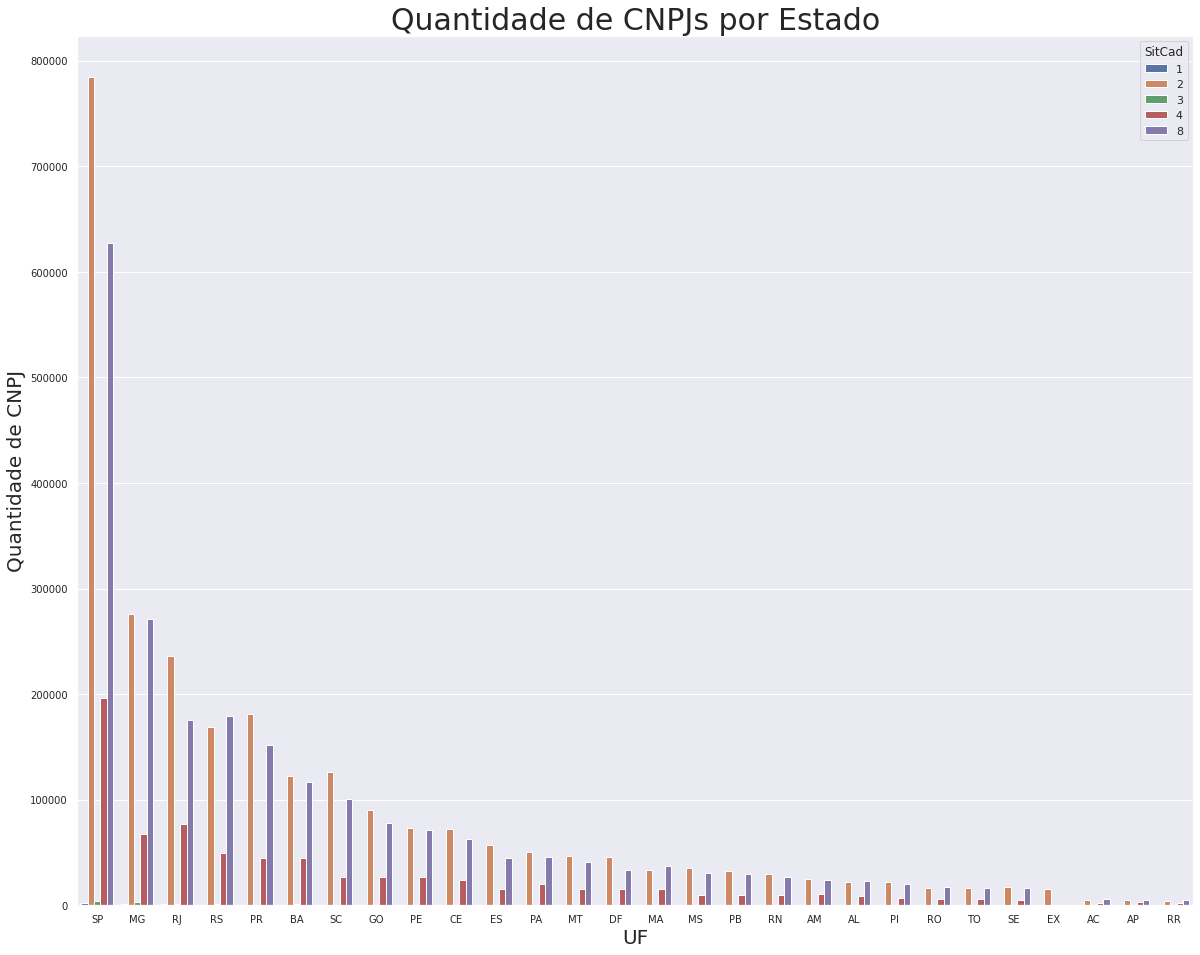

In [20]:
stacked = ct.stack().reset_index().rename(columns={0:'value'})
plt.figure(figsize=(20, 16))
ax = sns.barplot(x=stacked.UF, y=stacked.value, hue=stacked.SitCad, order =contUF)
ax.set_title('Quantidade de CNPJs por Estado', fontsize=30)
ax.set_xlabel('UF',fontsize=20)
ax.set_ylabel('Quantidade de CNPJ',fontsize=20)
ax.tick_params(labelsize=10)
plt.show()

#Analise CNAE

In [21]:
#Analise dos 5 maiores CNAE Principais
dados['CNAEPrinc'].value_counts().head()

9492800    336696
4781400    325640
8888888    180827
5611203    178560
9602501    158067
Name: CNAEPrinc, dtype: int64

In [22]:
#Porém o dado acima nos mostra todas as situações cadastrais.
#Uma analise melhor ocorre quando buscamos apenas os CNPJs ativos:
analise_ativos = dados.query('SitCad == 2')
analise_ativos

,CNPJBase,CNPJOrdem,CNPJDV,IDMatriz,NomeFantasia,SitCad,DataSitCad,MotivoSitCad,CidadeExt,Pais,DataInicio,CNAEPrinc,CNAESec,TipoLogr,Logr,Numero,Compl,Bairro,CEP,UF,Municipio,DDD1,TEL1,DDD2,TEL2,DDDFax,Fax,email,SitEsp,DataSitEsp
1,33600832,1,6,1,DALUARI BOUTIQUE,2,20190513,0,NaN,NaN,2019-05-13,4781400,"4782201,4782202,4783101,4783102",AVENIDA,JOSE TOZZI,1831,LOJA 04,CENTRO,29930245.0,ES,5697,27,3.76382e+07,NaN,NaN,NaN,NaN,CADASTRO@PEREIRABCONTABILIDADE.COM.BR,NaN,NaN
2,33600844,1,22,1,NaN,2,20190513,0,NaN,NaN,2019-05-13,4399103,4330404,AVENIDA,TOKISHIRO TOYAMA,194,NaN,CENTRO,18180000.0,SP,7171,15,9.98423e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,33600854,1,68,1,IARA GASTROPEDIATRA,2,20190513,0,NaN,NaN,2019-05-13,8610102,8630503,RUA,DEZ,SN,NaN,PLANALTO VINHAIS II,65074863.0,MA,921,98,8.1771e+07,NaN,NaN,NaN,NaN,SEBACARIBEIRO@YAHOO.COM,NaN,NaN
4,33600865,1,48,1,VIVI BELLE,2,20190513,0,NaN,NaN,2019-05-13,4781400,4789099,RUA,MARTINS TORRES,542,APT 203;BLOCO 06,SANTA ROSA,24240705.0,RJ,5865,21,2.61022e+07,NaN,NaN,NaN,NaN,vidsouza13@gmail.com,NaN,NaN
5,33600878,1,17,1,MEYER SERVICOS MEDICOS,2,20190513,0,NaN,NaN,2019-05-13,8630503,8630501,RUA,EUNICE FERRAZ FERNANDES,206,SALA 07,JARDIM DO LAGO,12914500.0,SP,6251,11,9.71639e+07,11.0,9.91863e+07,11.0,4.03377e+07,JORUBIOMEYER@GMAIL.COM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640699,41906057,1,31,1,MARILDA HELENA,2,20210511,0,NaN,NaN,2021-05-11,9700500,NaN,RUA,DAS VIOLETAS,491,NaN,CIDADE ALEGRIA,27525141.0,RJ,5883,24,9.88225e+07,NaN,NaN,NaN,NaN,LENANOGUEIRA@YAHOO.COM.BR,NaN,NaN
5640700,41906069,1,66,1,CAROLSALGADOS,2,20210511,0,NaN,NaN,2021-05-11,5620104,1096100,RUA,IMUTA,427,CASA 2,PECHINCHA,22770600.0,RJ,6001,21,6.92053e+07,NaN,NaN,NaN,NaN,WELLINTONWRS@HOTMAIL.COM,NaN,NaN
5640701,41906079,1,0,1,NEGO BEBIDAS,2,20210511,0,NaN,NaN,2021-05-11,4723700,4712100,AVENIDA,JACARANDA,791,CASA,PARATIBE,58062090.0,PB,2051,83,8.84593e+07,NaN,NaN,NaN,NaN,LSA.BELYYNHA29@GMAIL.COM,NaN,NaN
5640702,41906089,1,37,1,CHURRAS-BURGUERS,2,20210511,0,NaN,NaN,2021-05-11,1094500,"1096100,1013901",RUA,HORACIO NOBREGA,N/N,SETOR AO LADO DA STTRANS PATOS PB,BELO HORIZONTE,58704000.0,PB,2117,83,9.12031e+07,NaN,NaN,NaN,NaN,SELMARODRIGUESICNV@GMAIL.COM,NaN,NaN


In [23]:
#Analise dos 5 maiores CNAE Principais, com CNPJ ativo:
analise_ativos['CNAEPrinc'].value_counts().head()

4781400    131483
9602501    100180
7319002     69449
4399103     64481
5611203     56288
Name: CNAEPrinc, dtype: int64

Porém a tabela possui apenas a nomeração do CNAE, e para a análise,é importarte saber de fato do que se trata o empreendimento, portanto, através do site do [IBGE](https://cnae.ibge.gov.br/classificacoes/download-concla/8265-download) é possivel extrair a informação desejada, criando o DataFrame abaixo.


In [24]:
url = 'http://200.152.38.155/CNPJ/F.K03200$Z.D10510.CNAECSV.zip'
col_Names = ['Codigo', 'Atividade']
cnae = pd.read_csv(url, sep = ';', encoding = 'latin1', names = col_Names)

In [25]:
cnae.head()

,Codigo,Atividade
0,111301,Cultivo de arroz
1,111302,Cultivo de milho
2,111303,Cultivo de trigo
3,111399,Cultivo de outros cereais não especificados an...
4,112101,Cultivo de algodão herbáceo


Então é possivel realizar uma consulta a qual atividade exercida pelos 5 mais frequentes, por exemplo:


In [26]:
pd.set_option("display.max_colwidth", None)

In [27]:
lista_cnae = [4781400, 9602501, 7319002, 4399103, 5611203]
cnae.query('Codigo in @lista_cnae')

,Codigo,Atividade
662,4399103,Obras de alvenaria
879,4781400,Comércio varejista de artigos do vestuário e acessórios
977,5611203,"Lanchonetes, casas de chá, de sucos e similares"
1126,7319002,Promoção de vendas
1339,9602501,"Cabeleireiros, manicure e pedicure"


#Análise Cidade

Da mesma forma podemos incluir um outro DataFrame pra nos auxiliar na análise, com a conversão do código para o nome do município. Tambem podemos incluir algumas outras informações, também dos estados, através do arquivo extraido do site da [Rede SUAS](http://blog.mds.gov.br/redesuas/lista-de-municipios-brasileiros/)

In [29]:
#Carregamento da tabela para identificação da Cidade
url = 'http://200.152.38.155/CNPJ/F.K03200$Z.D10510.MUNICCSV.zip'
col_Names = ['Codigo','Municipio']
cod_mun = pd.read_csv(url, sep = ';', names = col_Names)
cod_mun.head()

,Codigo,Municipio
0,1,GUAJARA-MIRIM
1,2,ALTO ALEGRE DOS PARECIS
2,3,PORTO VELHO
3,4,BURITIS
4,5,JI-PARANA


In [30]:
#Agora é possivel saber o nome das cidades utilizando o código presente no DF de CNPJs:
cod_mun.query('Codigo == 7171')

,Codigo,Municipio
4172,7171,TAPIRAI


In [31]:
#Importação da tabela com mais informações sobre as cidades:
url = 'http://blog.mds.gov.br/redesuas/wp-content/uploads/2018/06/Lista_Munic%C3%ADpios_com_IBGE_Brasil_Versao_CSV.csv'
cidades = pd.read_csv(url, sep = ';', encoding = 'latin1')
cidades.head()

,ConcatUF+Mun,IBGE,IBGE7,UF,Município,Região,População 2010,Porte,Capital,Unnamed: 9
0,ROAlta Floresta D'oeste,110001,1100015,RO,Alta Floresta D´oeste,Região Norte,24392.0,Pequeno II,NaN,PROCV(A2;'[Lista de Municípios com IBGE - Brasil.xlsx]Lista de Municípios IBGE'!$A$2:$G$5566;4;0)
1,ROAriquemes,110002,1100023,RO,Ariquemes,Região Norte,90353.0,Médio,NaN,PROCV(A2;'Lista de Municípios IBGE'!$A$2:$G$5566;4;0)
2,ROCabixi,110003,1100031,RO,Cabixi,Região Norte,6313.0,Pequeno I,NaN,NaN
3,ROCacoal,110004,1100049,RO,Cacoal,Região Norte,78574.0,Médio,NaN,NaN
4,ROCerejeiras,110005,1100056,RO,Cerejeiras,Região Norte,17029.0,Pequeno I,NaN,NaN


As informações concatenadas e a ultima coluna não nos importam, portando iremos removê-las:

In [32]:
cidades.drop(['ConcatUF+Mun','Unnamed: 9'],
  axis='columns', inplace=True)
cidades.head()

,IBGE,IBGE7,UF,Município,Região,População 2010,Porte,Capital
0,110001,1100015,RO,Alta Floresta D´oeste,Região Norte,24392.0,Pequeno II,NaN
1,110002,1100023,RO,Ariquemes,Região Norte,90353.0,Médio,NaN
2,110003,1100031,RO,Cabixi,Região Norte,6313.0,Pequeno I,NaN
3,110004,1100049,RO,Cacoal,Região Norte,78574.0,Médio,NaN
4,110005,1100056,RO,Cerejeiras,Região Norte,17029.0,Pequeno I,NaN


Agora podemos aprofundar um pouco mais a filtragem dos CNAE, por exemplo, quais as cidades que mais exercercem a atividade mais exercida (4781400	- Comércio varejista de artigos do vestuário e acessórios).

In [35]:
analise_ativos.query('CNAEPrinc == 4781400')['Municipio'].value_counts()

7107    9328
6001    3805
9701    2137
4123    2039
1389    1867
        ... 
2197       1
6167       1
353        1
2241       1
51         1
Name: Municipio, Length: 4985, dtype: int64

In [37]:
#Criação da lista com as 5 Cidades
lista_mun = [7107, 6001, 9701, 4123, 1389]
#Busca pelas cidades:
cod_mun.query('Codigo in @lista_mun')

,Codigo,Municipio
1289,1389,FORTALEZA
2655,4123,BELO HORIZONTE
3594,6001,RIO DE JANEIRO
4140,7107,SAO PAULO
5424,9701,BRASILIA


In [38]:
#Mais informações sobre as cidades que mais exercem:
lista_cidade = ['São Paulo','Rio de Janeiro','Brasília','Belo Horizonte','Fortaleza']
#Busca por mais informações:
cidades.query('Município in @lista_cidade')

,IBGE,IBGE7,UF,Município,Região,População 2010,Porte,Capital
949,230440,2304400,CE,Fortaleza,Região Nordeste,2452185.0,Metrópole,Capital
2309,310620,3106200,MG,Belo Horizonte,Região Sudeste,2375151.0,Metrópole,Capital
3242,330455,3304557,RJ,Rio de Janeiro,Região Sudeste,6320446.0,Metrópole,Capital
3829,355030,3550308,SP,São Paulo,Região Sudeste,11253503.0,Metrópole,Capital
5569,530010,5300108,DF,Brasília,Região Centro-Oeste,2570160.0,Metrópole,Capital


Percebe-se que são todas capitais de seus estados, onde ocorre maior densidade demografica, sendo todas metrópoles quanto ao tamanho. Interessante notar que 3 se encontram na Região Sudeste, portanto uma empresa que presta consultoria nessa área pode encontrar muitas oportunidades nessa área.